In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [65]:
# Load dataset 

df = pd.read_csv(r"C:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\CodeXIntern-Projects\dataset\train.csv")

In [66]:
# --- Basic Info ---

print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())               

Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [67]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [68]:
print("Average of the column Age is :",round(df['Age'].mean()))       

Average of the column Age is : 30


In [69]:
print("Average of the column Fare is :",round(df['Fare'].mean()))

Average of the column Fare is : 32


In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1              # we dont need sibsp and parch if we just add them in familysize
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)           # if the person is alone == 1 

In [72]:
# lets create a function which takes Name as input and put the initials in "Title"
# and for age lets create a age  


def extract_title(name):
    m = re.search(r",\s*([^\.]+)\.", str(name))
    return m.group(1).strip() if m else "Unknown"
df["Title"] = df["Name"].apply(extract_title)

df["AgeBin"] = pd.cut(df["Age"], bins=[0,12,18,30,50,80], 
                      labels=["Child","Teen","Young Adult","Adult","Senior"])
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=["Low","Medium","High","Very High"])

In [73]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

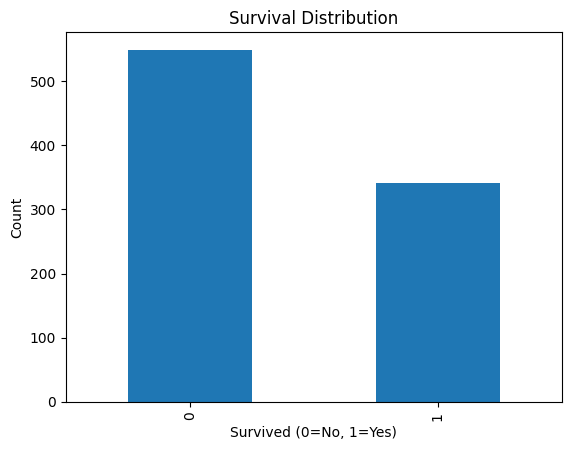

In [74]:
# --- Target Distribution ---

df["Survived"].value_counts().plot(kind="bar", title="Survival Distribution")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

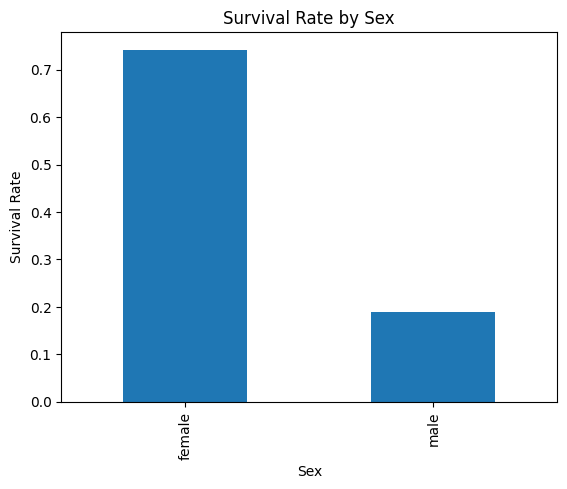

In [75]:
# --- Survival by Sex ---

df.groupby("Sex")["Survived"].mean().plot(kind="bar", title="Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

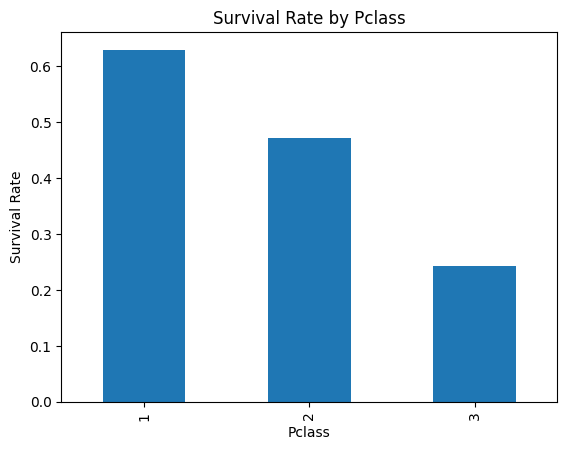

In [76]:
# --- Survival by Pclass ---

df.groupby("Pclass")["Survived"].mean().plot(kind="bar", title="Survival Rate by Pclass")
plt.ylabel("Survival Rate")
plt.show()

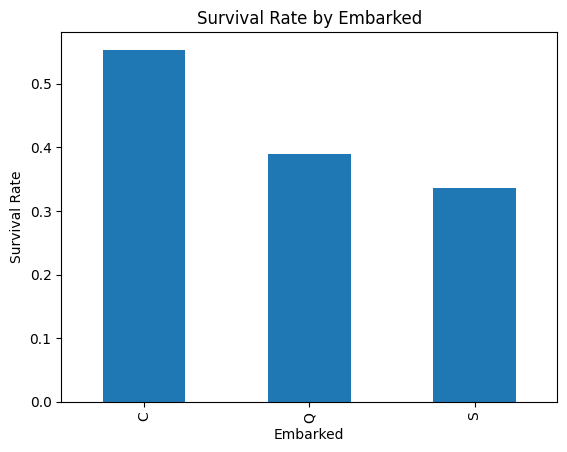

In [77]:
# --- Survival by Embarked ---

df.groupby("Embarked")["Survived"].mean().plot(kind="bar", title="Survival Rate by Embarked")
plt.ylabel("Survival Rate")
plt.show()

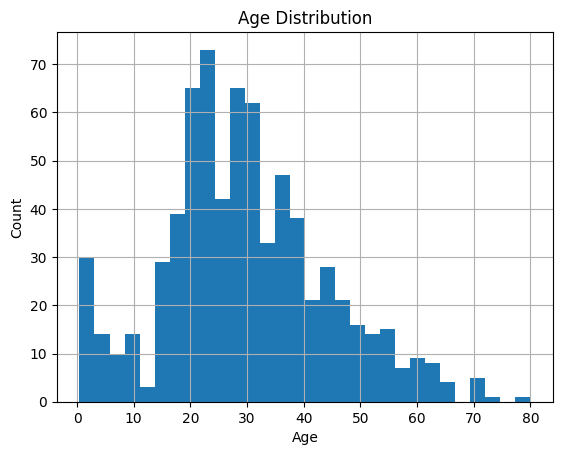

In [78]:
# --- Age Distribution ---

df["Age"].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

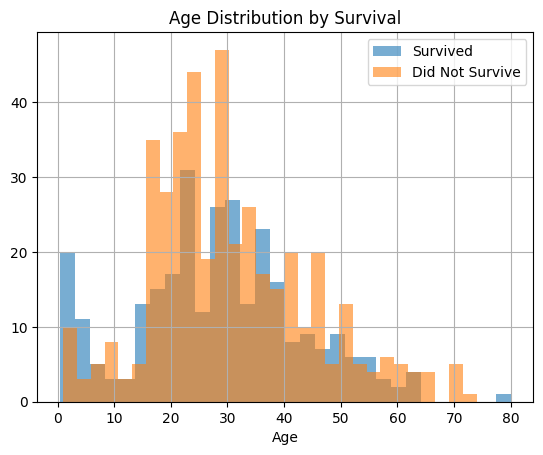

In [79]:
# Age vs Survival

df[df["Survived"]==1]["Age"].hist(bins=30, alpha=0.6, label="Survived")
df[df["Survived"]==0]["Age"].hist(bins=30, alpha=0.6, label="Did Not Survive")
plt.legend()
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.show()

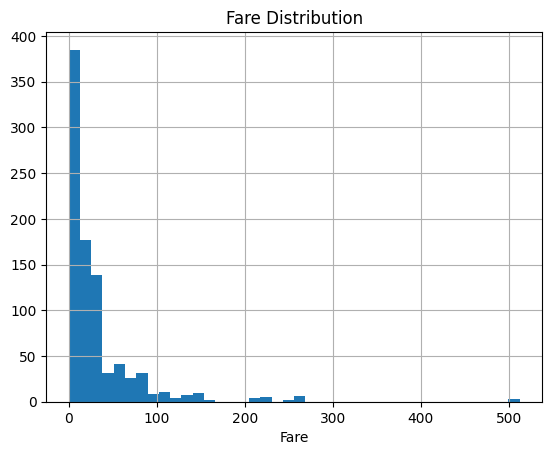

In [80]:
# --- Fare Distribution ---

df["Fare"].hist(bins=40)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

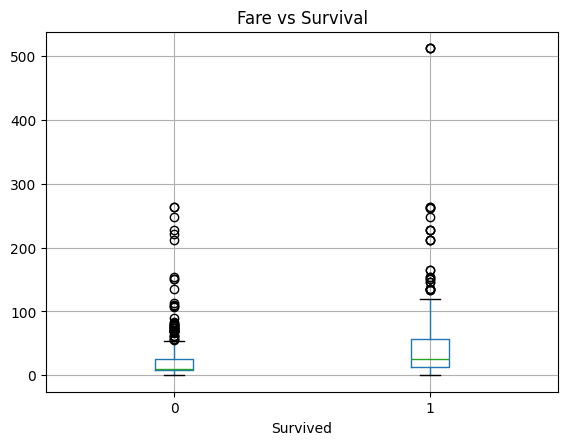

In [81]:
# Fare vs Survival (boxplot)

df.boxplot(column="Fare", by="Survived")
plt.title("Fare vs Survival")
plt.suptitle("")
plt.show()

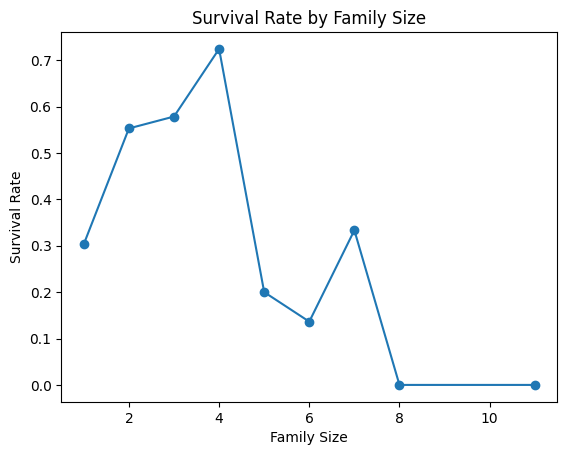

In [82]:
# --- Survival by Family Size ---

df.groupby("FamilySize")["Survived"].mean().plot(marker="o")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

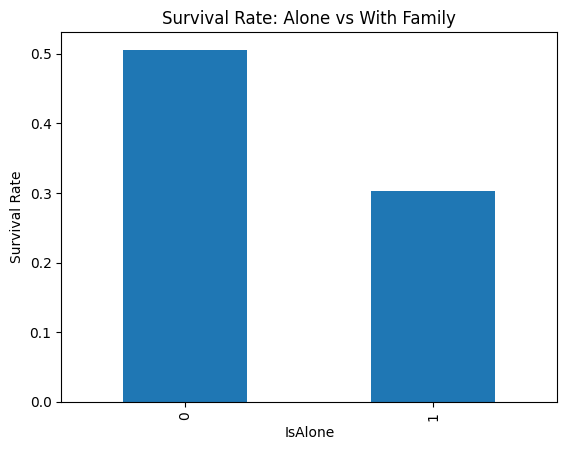

In [83]:
# --- Survival by Alone ---

df.groupby("IsAlone")["Survived"].mean().plot(kind="bar", title="Survival Rate: Alone vs With Family")
plt.ylabel("Survival Rate")
plt.show()

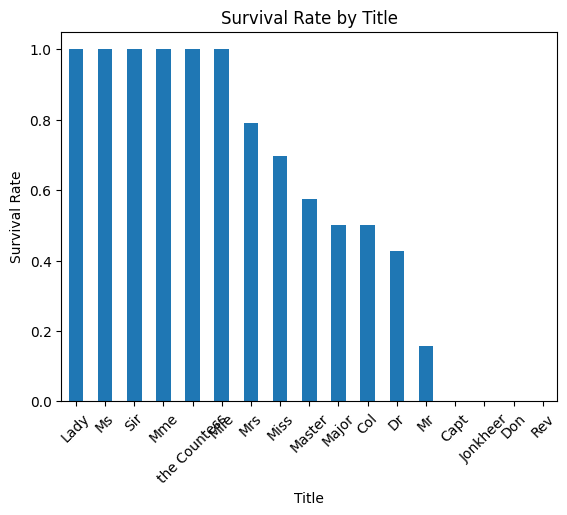

In [84]:
# --- Survival by Title ---

plt.Figure(figsize= (10,10))
df.groupby("Title")["Survived"].mean().sort_values(ascending=False).plot(kind="bar", title="Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()

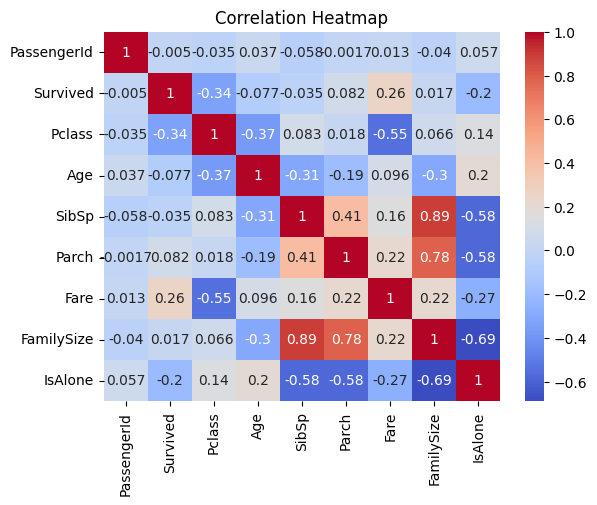

In [85]:
# --- Correlation Heatmap ---

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [86]:
# --- Quick Findings ---

print("\n--- SUMMARY FINDINGS ---")
print("1. Females had a much higher survival rate than males.")
print("2. 1st class passengers had the highest survival, 3rd class the lowest.")
print("3. Children had better survival rates compared to adults.")
print("4. Passengers paying higher fares were more likely to survive.")
print("5. Being alone reduced chances of survival; small families had better survival.")
print("6. Titles (e.g., Mrs, Miss, Master) strongly influenced survival patterns.")


--- SUMMARY FINDINGS ---
1. Females had a much higher survival rate than males.
2. 1st class passengers had the highest survival, 3rd class the lowest.
3. Children had better survival rates compared to adults.
4. Passengers paying higher fares were more likely to survive.
5. Being alone reduced chances of survival; small families had better survival.
6. Titles (e.g., Mrs, Miss, Master) strongly influenced survival patterns.


In [87]:
# 🚢 Titanic EDA — Summary of Findings

# 1. Survival Overview
  # Around 38% of passengers survived, while 62% did not.
  # This shows survival was not evenly distributed, hinting that certain groups had advantages.

# 2. Gender
  # Females survived at a much higher rate (~74%) compared to males (~19%).
  # This strongly supports the “Women and children first” rescue policy.
  # Gender was the most influential survival factor.

# 3. Passenger Class (Pclass)
  # 1st class passengers had the highest survival rate (~63%).
  # 2nd class survival was moderate (~47%).
  # 3rd class passengers had the lowest survival (~24%).
  # This shows wealth/social status played a key role in survival.

# 4. Age
  # Children (Age < 10) had higher survival (~60%), reflecting the “save children first” approach.
  # Young adults (20–40 years) had lower survival chances.
  # Elderly passengers (>60 years) also had very low survival rates, indicating age vulnerability.

# 5. Fare
  # Passengers who paid higher fares were more likely to survive.
  # Low-fare passengers (mostly 3rd class) had the worst survival.  
  # Suggests cabin location (upper deck vs lower deck) or access to lifeboats mattered.

# 6. Embarked Port (C, Q, S)
  # Passengers from Cherbourg (C) had the highest survival (~55%).
  # Southampton (S) passengers had the lowest (~34%) survival.
  # This links to class differences, as many 1st class passengers boarded at Cherbourg.

# 7. Family Size (SibSp + Parch)
  # Passengers traveling alone had lower survival (~30%).
  # Having 1–2 family members increased survival chances (~50%).
  # Very large families (>5 members) again had low survival (harder to save big groups).

# 8. Fare Bins (Low / Medium / High / Very High)
  # Very High Fare passengers had the best survival (~60%+).
  # Low Fare passengers had the worst survival (<25%).
  # Confirms the rich had better survival chances.

# 📝 Key Insights

   # Being female, young, or wealthy significantly increased survival chances.
   # 3rd class males had the lowest survival probability.
   # Social status + gender + age together explain most of the survival patterns.
   # The Titanic tragedy was not random — systematic inequalities influenced survival.